Upload data to sqlite tables.

In [1]:
import pandas as pd
import numpy as np
from IPython import display as dis
import scipy.io.wavfile as wav
import tensorflow as tf
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import basic_rnn_seq2seq
from tensorflow.contrib.rnn import RNNCell, LSTMCell, MultiRNNCell
from scipy import signal 
from librosa import core

from matplotlib import pyplot as plt
import time

%matplotlib inline

In [2]:
x_y = pd.read_pickle("dataset/x_y.pkl")
x_y = x_y.sample(frac=1)

In [3]:
time_step = 0
hidden_layers = 1
batch_size = 7
feature_count = 1
latent_dim = 61 
rate=8000

In [4]:
x_y

,sigs,emotion
file_name,,
Ses01F_script01_1_F014,"[[0.00120423], [0.0024498], [0.00351334], [0.0...",Frustration
Ses01F_script01_3_M023,"[[-0.0016493], [-0.00471546], [-0.00524028], [...",Sadness
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise
Ses01F_script01_3_F012,"[[-0.00843145], [-0.0103935], [-0.0168974], [-...",Happiness
Ses01F_script01_1_F030,"[[0.0269699], [0.0414659], [0.0532195], [0.065...",Neutral state
Ses01F_script01_2_F005,"[[0.00558454], [0.00774629], [0.00480964], [0....",Anger
Ses01F_script01_3_F013,"[[-0.0302205], [-0.0307595], [-0.00110702], [0...",Happiness
Ses01F_script01_1_F013,"[[0.000583267], [0.00202771], [0.00188047], [0...",Frustration
Ses01F_script01_1_F009,"[[-0.00121218], [-0.00212365], [-0.00153134], ...",Frustration


In [5]:
dis.Audio(data = x_y.iloc[-1,:].sigs.ravel(), rate = rate )

Signal [-0.00100825  0.00018671 -0.00142541 ..., -0.00630302 -0.01030979
 -0.01596927]


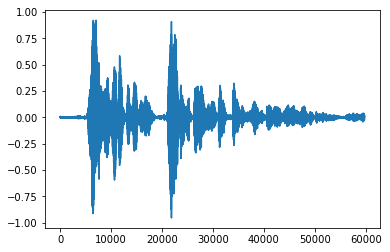

In [6]:
print("Signal",x_y.iloc[-1,:].sigs.ravel())
plt.plot(x_y.iloc[-1,:].sigs.ravel())

In [7]:
x_y.loc[:,"sequence_length"] = None
x_y.loc[:,"max"] = None

time_step = max([sig.shape[0] for sig in x_y.sigs ])
print(time_step)

93498


In [8]:
for index, row in x_y.iterrows():
    sig = row.sigs
    row.sequence_length = sig.shape[0]
    row.max = max(abs(sig))
    sig = sig / row.max
    sig = np.concatenate((sig, np.zeros((time_step - row.sequence_length,1))))
    #sig = np.pad(sig, (0, time_step - row.sequence_length), mode = "constant")
    sig = np.reshape(sig, (1,-1, 1)) 
    row.sigs = sig 

(49, 93498, 1)
Signal [[-0.00105658]
 [ 0.00019566]
 [-0.00149373]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] Rate 8000 Max time step: 93498


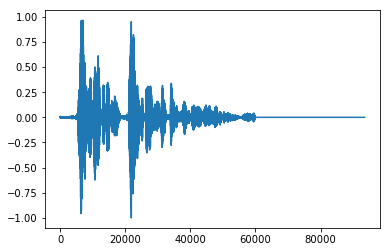

In [9]:
sigs = np.concatenate(x_y.sigs.values)
print(sigs.shape)
print("Signal",sigs[-1], "Rate", rate, "Max time step:", time_step)
plt.plot(sigs[-1])

In [10]:
dis.Audio(data = sigs[-1].ravel(), rate = rate)

In [11]:
class Data(object):
    x = sigs #+ np.random.normal(scale=0.01, size = sigs.shape)
    y_ = sigs
    s = x_y.sequence_length.values

In [12]:
print("Signal",Data.x[-1], "Shape", Data.x.shape, "Rate", rate, "Max time step:", time_step)

Signal [[-0.00105658]
 [ 0.00019566]
 [-0.00149373]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] Shape (49, 93498, 1) Rate 8000 Max time step: 93498


In [13]:
dis.Audio(data = Data.x[-1].ravel(), rate = rate)

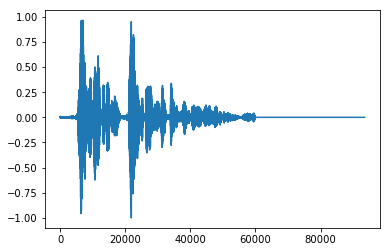

In [14]:
plt.plot(Data.x[-1])

In [15]:
dis.Audio(data = Data.y_[-1].ravel(), rate = rate)

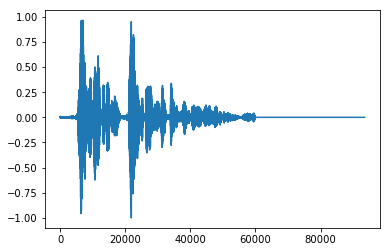

In [16]:
plt.plot(Data.y_[-1])

In [17]:
#["batch_size", "steps", "step_size", "feature_count"]
[batch_size, time_step, feature_count ]

[7, 93498, 1]

In [18]:
class network(object):
    
    def __init__(self):
        pass
            
    def build_layers(self):
        
        tf.reset_default_graph()
        #learning_rate = tf.Variable(initial_value=0.001)

        global time_step 
        global batch_size 
        global hidden_layers
        global step_size
        global latent_dim
        
        with tf.variable_scope("Input"):
            self.x = tf.placeholder("float32", shape=[batch_size, time_step, feature_count], name='x')
            self.y_ = tf.placeholder("float32", shape=[batch_size, time_step, feature_count], name='y')
            self.seq_length = tf.placeholder("float32", shape=[batch_size])
            
            self.keep_prob = tf.placeholder("float", name='kp')
            self.lr = tf.placeholder("float", name='lr')
            
        with tf.variable_scope("encoder"):
            enc_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #enc_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.state = enc_lstm.zero_state(batch_size, "float")
            print("State:",self.state)
            
            print("Audio Input:", self.x)
            self.enc_output, self.state = tf.nn.dynamic_rnn(enc_lstm, self.x, initial_state = self.state, 
                                                            sequence_length=self.seq_length, parallel_iterations = 4)
            self.enc_state = self.state
            print("Encoder Output:",self.enc_output)

        with tf.variable_scope("decoder"):
            dec_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #dec_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.dec_output, self.state = tf.nn.dynamic_rnn(dec_lstm, self.enc_output, initial_state = self.state, 
                                                            sequence_length=self.seq_length, parallel_iterations = 4)
            
            self.dec_output = tf.layers.dense(self.dec_output, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.output = tf.layers.dense(self.dec_output, units = 1, kernel_regularizer=tf.nn.l2_loss)
            print("Decoder Output:",self.dec_output)
            
        with tf.variable_scope("Optimize"):
            #loss = tf.contrib.seq2seq.sequence_loss(self.output, self.x, tf.ones(shape=[batch_size, time_step]))
            #self.loss = tf.losses.absolute_difference(tf.abs(self.y_), tf.abs(self.output))
            #self.loss = tf.reduce_sum(tf.abs(self.y_)) - tf.reduce_sum(tf.abs(self.output))
            #self.y__norm = tf.square(self.y_)
            #self.output_norm = tf.square(self.output) 
            #self.loss = tf.losses.mean_squared_error(self.y__norm, self.output_norm)
            self.loss = tf.losses.huber_loss(self.y_, self.output)
            
            optimizer = tf.train.AdamOptimizer(self.lr)
            self.opti_op = optimizer.minimize(self.loss)
        print("Final Output:", self.output)

            
        

In [19]:
import collections

y_pred_list = []
final_state = None
Data.loss = []
class Train:    
    
    def train(net, epochs, lrs, x, y, s):
        global final_state
        
        with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            for lr in lrs:
                for epoch in range(1, epochs+1):
                    
                    Data.state_h = []
                    Data.state_c = []
                    
                    for i in range(0,49,7):
                        x_train = x[i:i+7,...]
                        y_train = y[i:i+7,...]
                        s_train = s[i:i+7]
                        net_output = sess.run(
                                            [net.opti_op, net.enc_state, 
                                             net.x, net.y_, 
                                             net.output, net.loss, 
                                             net.enc_output], #net.summary_op
                                              feed_dict={net.x: x_train, 
                                                         net.y_: y_train,
                                                         net.seq_length:s_train,
                                                         net.keep_prob:1,
                                                         net.lr:lr})
          
                        _, state, Data.x_norm, Data.y_norm, Data.y, loss, Data.enc = net_output    
                        print("Step {} lr {} Loss {}".format(epoch, lr, loss))
                        #plt.plot(Data.loss)
                        #display(plt.gcf())
                        Data.state_c.append(state.c)
                        Data.state_h.append(state.h)
                        Data.loss.append(loss)

In [ ]:
import itertools

class Hyperparameters:
    def start_training():
        
        epochs = 10
        lrs = [1e-6, 1e-8, 1e-10, 1e-12]
        n = network()
        n.build_layers()
        
        Train.train(n, epochs, lrs, Data.x, Data.y_, Data.s)
            

In [ ]:
Hyperparameters.start_training()

State: LSTMStateTuple(c=<tf.Tensor 'encoder/LSTMCellZeroState/zeros:0' shape=(7, 61) dtype=float32>, h=<tf.Tensor 'encoder/LSTMCellZeroState/zeros_1:0' shape=(7, 61) dtype=float32>)
Audio Input: Tensor("Input/x:0", shape=(7, 93498, 1), dtype=float32)
Encoder Output: Tensor("encoder/rnn/transpose:0", shape=(7, 93498, 61), dtype=float32)
Decoder Output: Tensor("decoder/dense/BiasAdd:0", shape=(7, 93498, 61), dtype=float32)
Final Output: Tensor("decoder/dense_2/BiasAdd:0", shape=(7, 93498, 1), dtype=float32)
Step 1 lr 1e-06 Loss 0.0012189351255074143


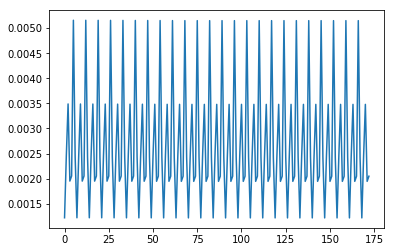

In [22]:
plt.plot(np.array(Data.loss))

In [23]:
#Data.output = np.array(Data.output)
Data.state_h = np.concatenate(Data.state_h)
Data.state_c = np.concatenate(Data.state_c)

In [24]:
plt.plot(Data.y__norm[3])

AttributeError: type object 'Data' has no attribute 'y__norm'

In [25]:
plt.plot.Data.output_norm

AttributeError: 'function' object has no attribute 'Data'

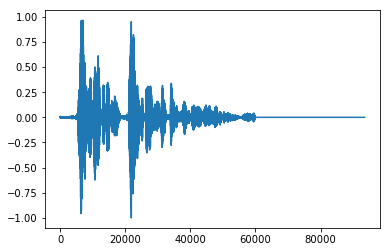

In [26]:
plt.plot(Data.y_[-1])

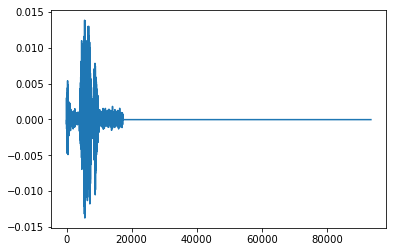

In [27]:
plt.plot(Data.y[-1])

In [28]:
y = Data.x[-1].ravel()
dis.Audio(data = y, rate = rate)

In [29]:
y = Data.y[-1].ravel()
dis.Audio(data = y, rate = rate)

In [30]:
x_y.loc[:,'state_h'] = None
x_y.loc[:,'state_c'] = None

for c, (index, row) in enumerate(x_y.iterrows()):
    print(Data.state_c[c].shape)
    print(Data.state_c[c].reshape((-1,1)).shape)
    row.state_h = Data.state_h[c].reshape((-1,1))
    row.state_c = Data.state_c[c].reshape((-1,1))
    

x_y.drop("max", axis = 1).to_pickle("dataset/x_y_sample_network_learned.pkl")
x_y

(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)
(61,)
(61, 1)


IndexError: index 35 is out of bounds for axis 0 with size 35